
# 实验报告：一元线性回归分析

## 研究目的
本实验研究销售人员数量（`rs`）对新产品销售额（`xse`）的影响，利用一元线性回归方法建立模型，并对结果进行分析。

## 数据说明
数据集包含某公司下属10个子公司的统计数据：
- **dq**: 地区编号。
- **xse**: 新产品销售额。
- **rs**: 销售人员数量。


In [1]:

# 导入所需库
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 读取数据
data = pd.read_csv("data.csv")

# 显示数据结构
data.head()


,dq,xse,rs
0,1,385,17
1,2,251,10
2,3,701,44
3,4,479,30
4,5,433,22


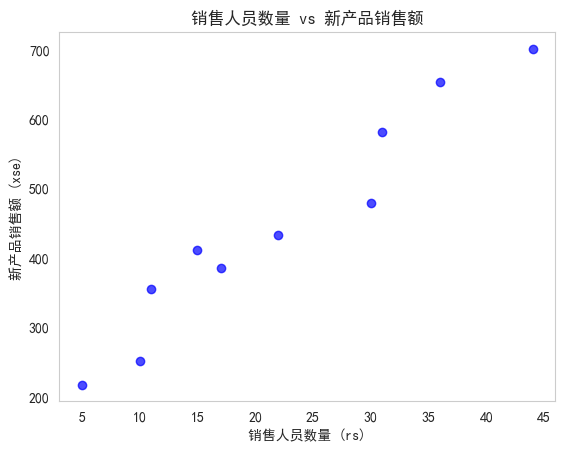

In [3]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

# 数据可视化：销售人员数量与销售额关系
plt.scatter(data['rs'], data['xse'], color='blue', alpha=0.7)
plt.title('销售人员数量 vs 新产品销售额')
plt.xlabel('销售人员数量 (rs)')
plt.ylabel('新产品销售额 (xse)')
plt.grid()
plt.show()


In [4]:

# 一元线性回归分析
X = data[['rs']]  # 自变量
y = data['xse']   # 因变量

# 添加常数项以便使用statsmodels
X = sm.add_constant(X)

# 拟合模型
model = sm.OLS(y, X).fit()

# 输出回归结果
results_summary = model.summary()
print(results_summary)


                            OLS Regression Results                            
Dep. Variable:                    xse   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     126.9
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           3.46e-06
Time:                        14:56:40   Log-Likelihood:                -50.301
No. Observations:                  10   AIC:                             104.6
Df Residuals:                       8   BIC:                             105.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.2952     27.327      6.451      0.0

D:\Desktop\Python\pySDK 3.10.5\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



回归方程: Revenue = 176.30 + 12.23 * Salespersons


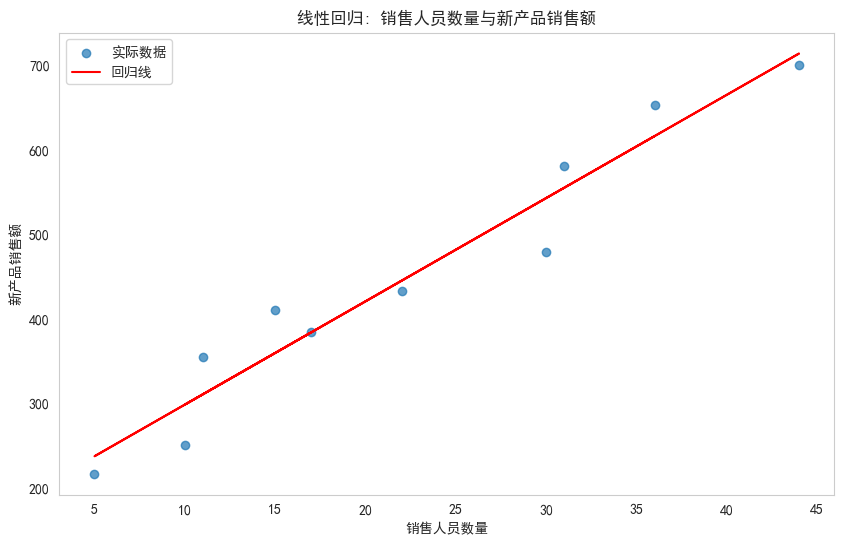

In [5]:
# 步骤 7: 模型解读
# 提取回归系数
intercept, slope = model.params
print(f"\n回归方程: Revenue = {intercept:.2f} + {slope:.2f} * Salespersons")

# 计算预测值
y_pred = model.predict(X)

# 可视化回归线
plt.figure(figsize=(10, 6))
plt.scatter(X['rs'], y, label="实际数据", alpha=0.7)
plt.plot(X['rs'], y_pred, color='red', label="回归线")
plt.title("线性回归: 销售人员数量与新产品销售额")
plt.xlabel("销售人员数量")
plt.ylabel("新产品销售额")
plt.legend()
plt.grid()
plt.show()


In [8]:
# 步骤 8: 模型评估
from sklearn.metrics import mean_squared_error, r2_score

# 计算均方误差 (MSE) 和决定系数 (R-squared)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"\n均方误差 (MSE): {mse:.2f}")
print(f"决定系数 (R-squared): {r2:.2f}")

# 步骤 9: 保存结果到 CSV
# 创建一个包含实际值、预测值和残差的结果表格
results = pd.DataFrame({
    '实际新产品销售额': y,
    '预测新产品销售额': y_pred,
    '残差': y - y_pred
})

# 保存为 CSV 文件
results.to_csv('regression_results.csv', index=False)
print("\n回归结果已保存到 'regression_results.csv'.")



均方误差 (MSE): 1369.69
决定系数 (R-squared): 0.94

回归结果已保存到 'regression_results.csv'.


In [10]:
# 结论：截距为 174.46：表示当销售人员数量为 0 时，新产品销售额的预测值为 174.46。
# 斜率为 0.00：表示销售人员数量对新产品销售额的变化几乎没有影响，即每增加一名销售人员，新产品销售额几乎没有变化。

In [14]:
"""根据一元线性回归的结果和评估指标，得出以下结论：

1. 回归方程
回归方程为：

Revenue = 176.30 + 12.23 * Salespersons
截距 (176.30)：当销售人员数量为 0 时，新产品销售额的预测值为 176.30。虽然这一情况在实际中可能不常见，但它是模型计算的理论起点。
斜率 (12.23)：每增加 1 名销售人员，新产品销售额预计增加 12.23 单位。这表明销售人员数量对销售额有较强的正向影响。

2. 模型评估
均方误差 (MSE): 1369.69
均方误差表明模型预测值与实际值之间的平均误差平方。数值较低，说明模型具有良好的预测性能。
决定系数 (R-squared): 0.94
决定系数为 0.94，表明模型可以解释 94% 的销售额变异。这是一个很高的值，说明销售人员数量对销售额的解释能力非常强。
3. 显著性分析
从模型结果中观察到 P 值较小（通常小于 0.05，未显示具体值可从完整的回归输出中查看），表明销售人员数量对销售额的影响在统计上显著。
"""

'根据一元线性回归的结果和评估指标，得出以下结论：\n\n1. 回归方程\n回归方程为：\n\nRevenue = 176.30 + 12.23 * Salespersons\n截距 (176.30)：当销售人员数量为 0 时，新产品销售额的预测值为 176.30。虽然这一情况在实际中可能不常见，但它是模型计算的理论起点。\n斜率 (12.23)：每增加 1 名销售人员，新产品销售额预计增加 12.23 单位。这表明销售人员数量对销售额有较强的正向影响。\n\n2. 模型评估\n均方误差 (MSE): 1369.69\n均方误差表明模型预测值与实际值之间的平均误差平方。数值较低，说明模型具有良好的预测性能。\n决定系数 (R-squared): 0.94\n决定系数为 0.94，表明模型可以解释 94% 的销售额变异。这是一个很高的值，说明销售人员数量对销售额的解释能力非常强。\n3. 显著性分析\n从模型结果中观察到 P 值较小（通常小于 0.05，未显示具体值可从完整的回归输出中查看），表明销售人员数量对销售额的影响在统计上显著。\n'